In [1]:
import BudykoSellers
import emulator_utils
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use a LaTeX-compatible serif font
    "font.serif": ["Computer Modern Roman"],  # Or another LaTeX font
})

%load_ext autoreload
%autoreload 2

### Experiment 1a - Uncoupled 3-box

List of experiments:

a) 2xCO2

b) High Emissions

c) Overshoot

#### Setup and Run Experiments

In [42]:
# Required variables
t_end, t_star = 251, 50
t = np.arange(0,t_end)
n_boxes = 3

# Initialize forcing vectors and run experiments
experiments = ['2xCO2','High Emissions','Overshoot']
forcings, full_outputs, T_out = {}, {}, {}
for i, exp in enumerate(experiments):
  full_outputs[exp] = BudykoSellers.Run_Budyko_Sellers(exp_flag=i, n_boxes=n_boxes)
  forcings[exp] = np.tile(full_outputs[exp]['forcing_ts'], (n_boxes, 1))
  T_out[exp] = np.squeeze(full_outputs[exp]['T_ts'])[0:n_boxes,:]

/Users/chriswomack/Documents/PhD/Project 1/BudykoSellers.py:320: UserWarning: Simulation has not reached equilibirum (diseq > 1e-3 W m-2)
  


### Method X: DMD

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 0.03860367970255494
	Test: High Emissions - 0.5797028764304448
	Test: Overshoot - 0.36215891248100207
Train: High Emissions - L2 Error
	Test: 2xCO2 - 0.8959799954788843
	Test: High Emissions - 0.0005985701476290286
	Test: Overshoot - 0.5596741242320096
Train: Overshoot - L2 Error
	Test: 2xCO2 - 1.4619034219246936
	Test: High Emissions - 0.02246502364064352
	Test: Overshoot - 0.000451478243680318


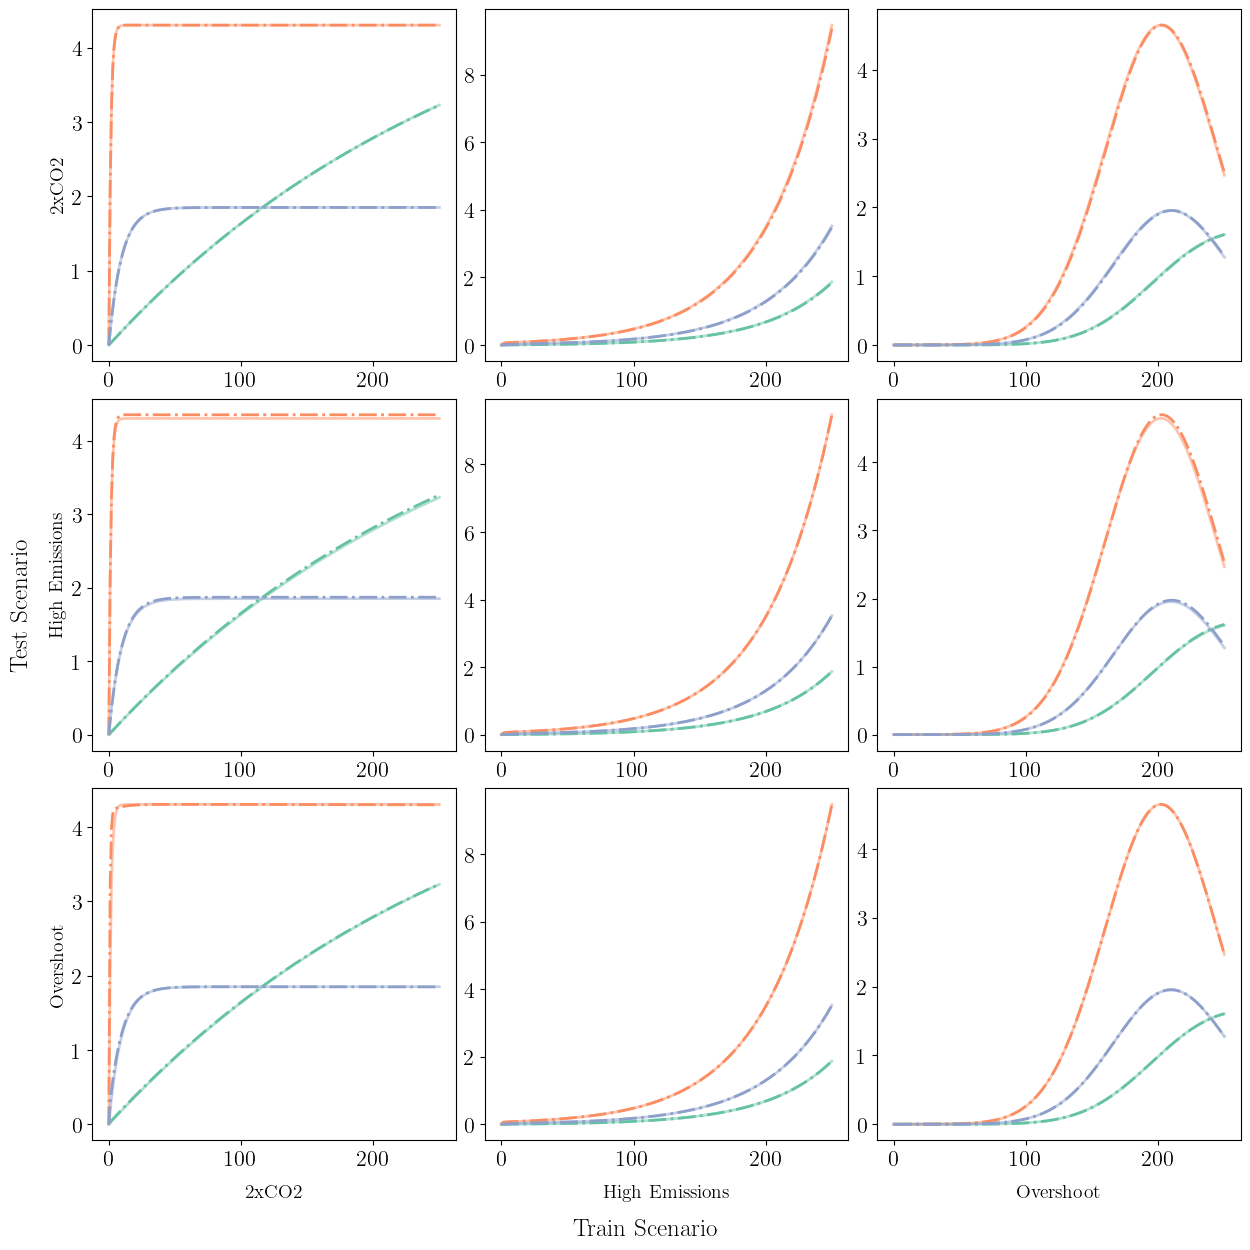

In [43]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
operator_DMD, T_pred_DMD, L2_DMD = emulator_utils.emulate_experiments('DMD', experiments=experiments, outputs=T_out, forcings=forcings, w0=w0, t=t, dt=dt, n_steps=n_steps, n_boxes=n_boxes)
emulator_utils.plot_true_pred(T_out, T_pred_DMD, experiments)

### Method X: EDMD

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 0.0386036797027385
	Test: High Emissions - 1.6195096573289265
	Test: Overshoot - 1.3357092684719545
Train: High Emissions - L2 Error
	Test: 2xCO2 - 0.9353018172094795
	Test: High Emissions - 0.0005983613658304556
	Test: Overshoot - 0.5673623146162273
Train: Overshoot - L2 Error
	Test: 2xCO2 - 1.455878630595877
	Test: High Emissions - 0.022465649400536605
	Test: Overshoot - 0.0004024220848004698


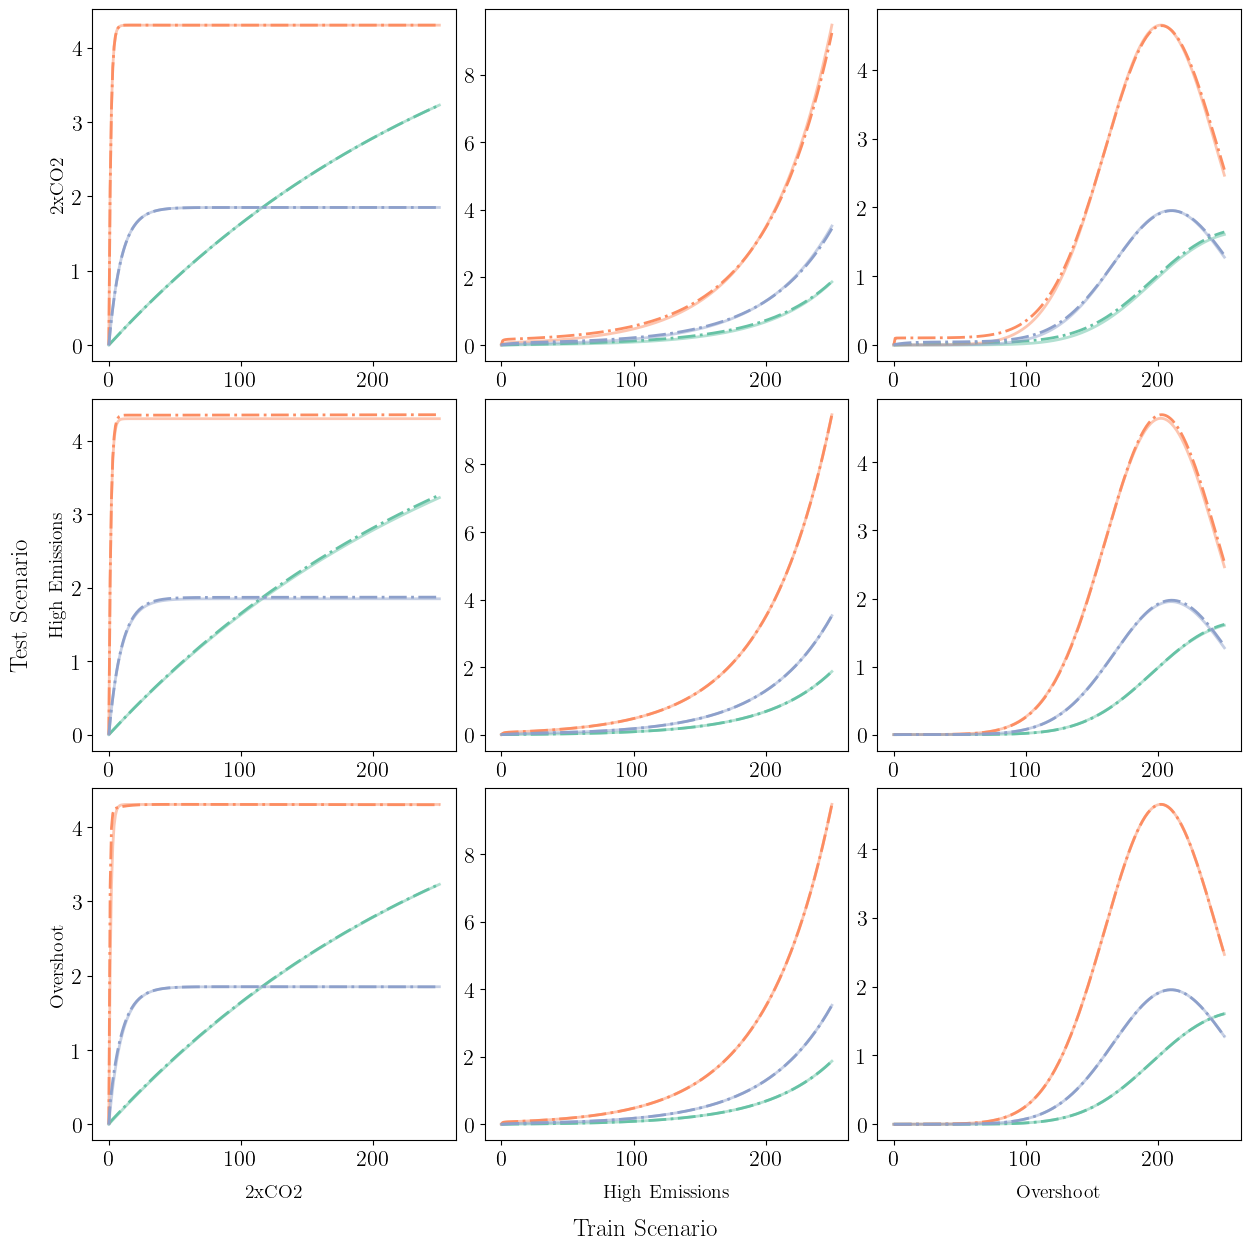

In [44]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
w_dict = emulator_utils.Vector_Dict(method='polynomial', degree=1)
F_dict = emulator_utils.Vector_Dict(method='polynomial', degree=1)
operator_EDMD, T_pred_EDMD, L2_EDMD = emulator_utils.emulate_experiments('EDMD', experiments=experiments, outputs=T_out, forcings=forcings, w0=w0, t=t, dt=dt,
                                                                n_steps=n_steps, n_boxes=n_boxes, w_dict=w_dict, F_dict=F_dict)
emulator_utils.plot_true_pred(T_out, T_pred_EDMD, experiments)

### Method X: Deconvolution

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - 2.13308779473121e-14
	Test: High Emissions - 0.565307660478443
	Test: Overshoot - 0.35421144543522953
Train: High Emissions - L2 Error
	Test: 2xCO2 - 0.8753618633080136
	Test: High Emissions - 3.1024171503776466e-14
	Test: Overshoot - 0.5472872401232058
Train: Overshoot - L2 Error
	Test: 2xCO2 - 972431.3764607814
	Test: High Emissions - 16018.89210791696
	Test: Overshoot - 4.4099480565561345e-14


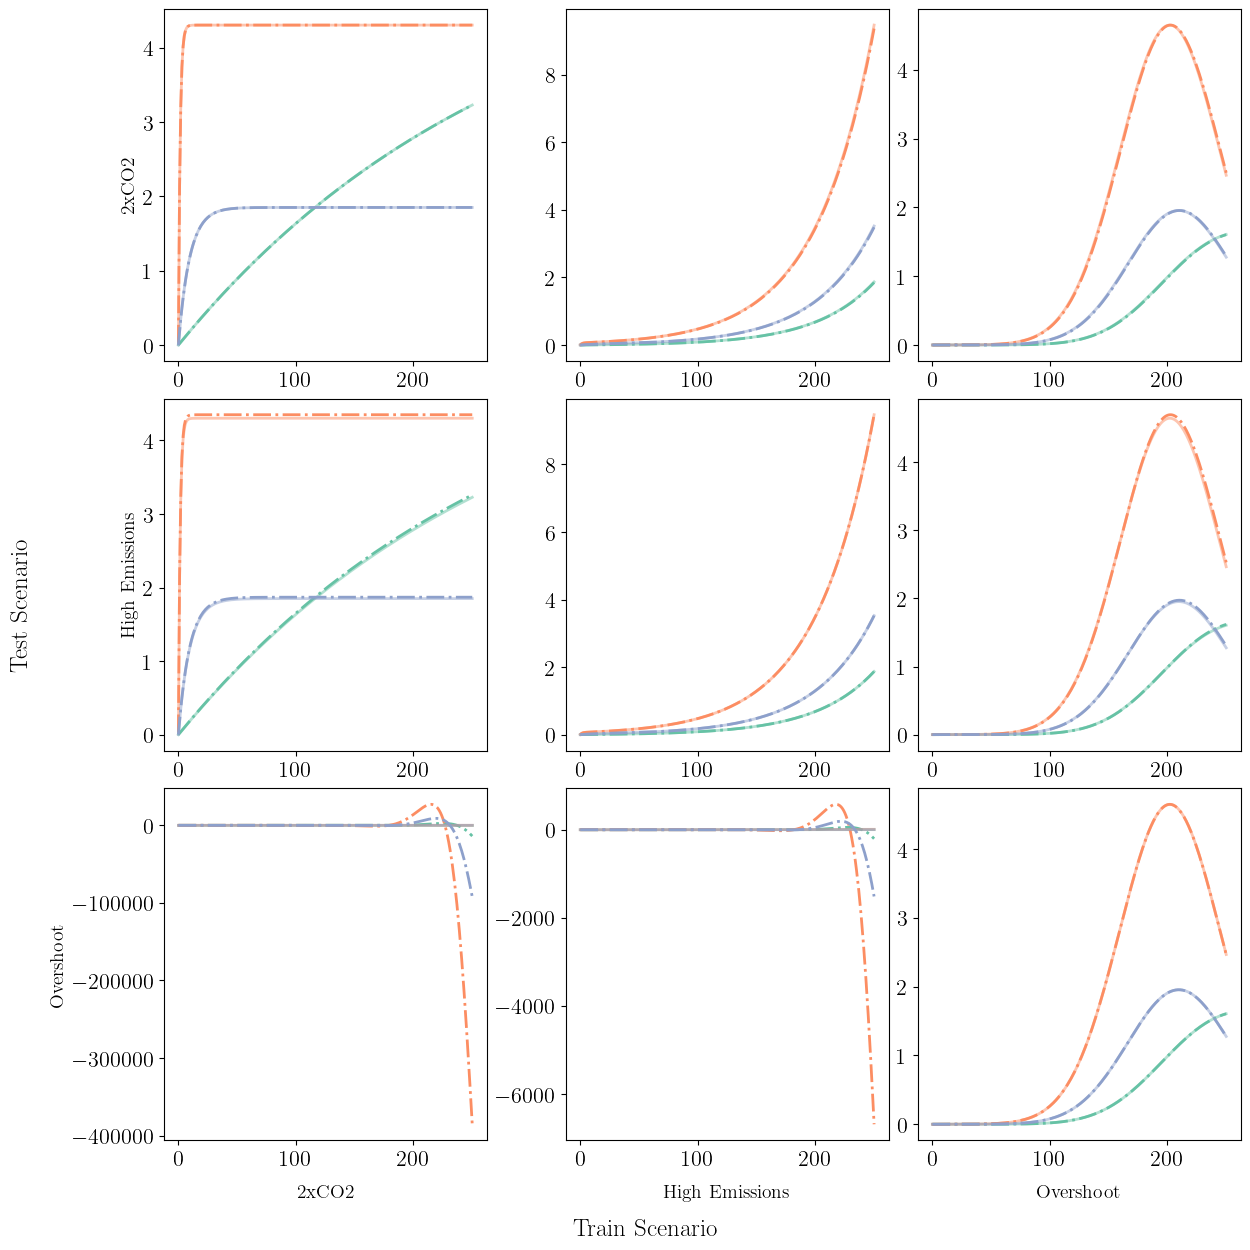

In [45]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
operator_deconvolve, T_pred_deconvolve, L2_deconvolve = emulator_utils.emulate_experiments('deconvolve', experiments=experiments, outputs=T_out, forcings=forcings, dt=dt)
emulator_utils.plot_true_pred(T_out, T_pred_deconvolve, experiments)

### Method X: Direct Diagnosis (FDT)

Train: Impulse Forcing - L2 Error
	Test: 2xCO2 - 1.1364133923084798
	Test: High Emissions - 0.1913142835121629
	Test: Overshoot - 0.6752484683493798


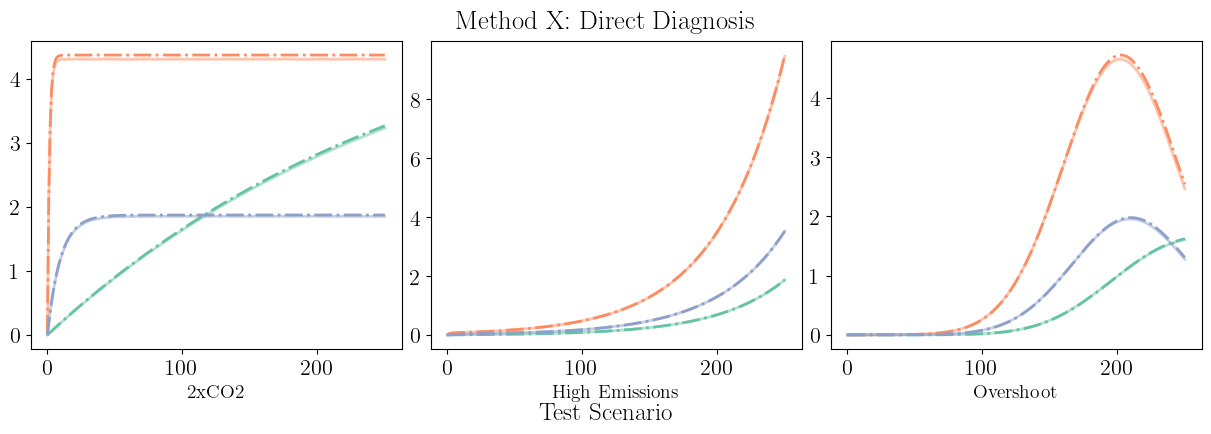

In [46]:
operator_direct, T_pred_direct, L2_direct = emulator_utils.emulate_experiments('direct', experiments=experiments, outputs=T_out, forcings=forcings, n_boxes=n_boxes, dt=dt)
emulator_utils.plot_true_pred_direct(T_out, T_pred_direct, experiments)

### Method X: Exponential Fit

Train: 2xCO2 - L2 Error
Exponential Fit Results:
 [ 0.40643473  0.93829432  0.39083387 -0.77395606]
	Test: 2xCO2 - 14.78599975224437
	Test: High Emissions - 11.359054576377703
	Test: Overshoot - 8.8241623600072
Train: High Emissions - L2 Error
Exponential Fit Results:
 [ 0.182428    0.92840055  0.34528177 -0.75920116]
	Test: 2xCO2 - 21.93287822793775
	Test: High Emissions - 0.1295028364096059
	Test: Overshoot - 5.445063844489383
Train: Overshoot - L2 Error
Exponential Fit Results:
 [-0.78195444 -3.18455931 -1.31757632 -0.76892125]
	Test: 2xCO2 - 19.497526133565977
	Test: High Emissions - 2.9592380443931283
	Test: Overshoot - 4.867397702952811


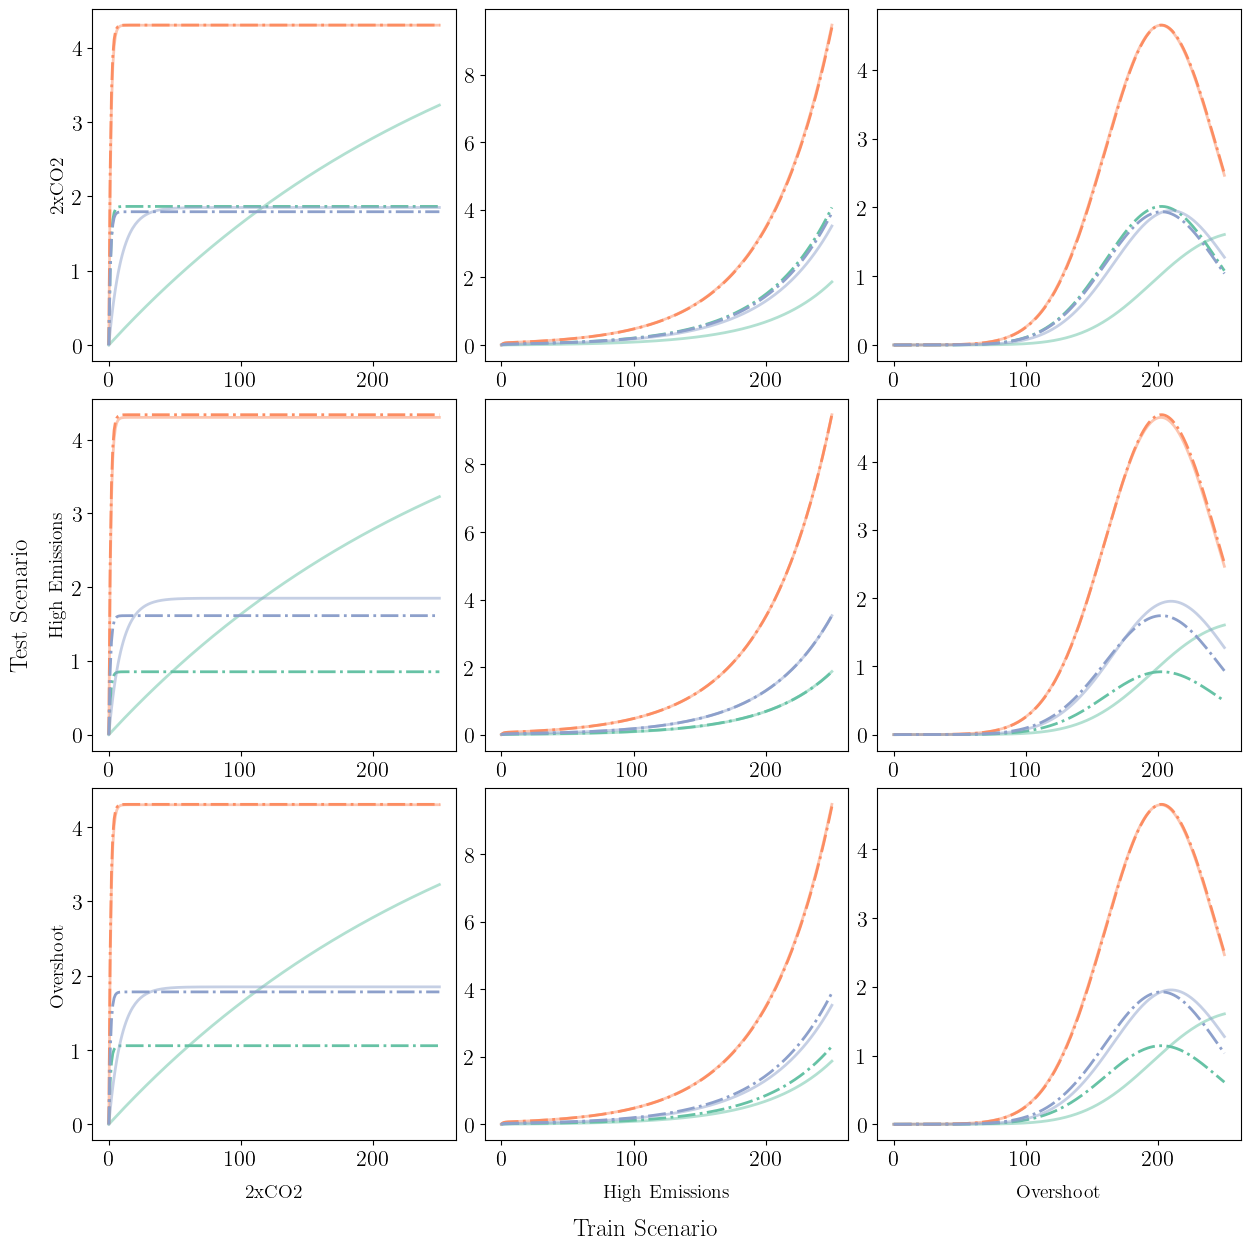

In [47]:
operator_fit, T_pred_fit, L2_fit = emulator_utils.emulate_experiments('fit', experiments=experiments, outputs=T_out, forcings=forcings, t=t, dt=dt, n_boxes=n_boxes, n_modes=1, B=np.ones(n_boxes))
emulator_utils.plot_true_pred(T_out, T_pred_fit, experiments)

### Method X: Exponential Fit w/ DMD as Initial Guess

Train: 2xCO2 - L2 Error
Exponential Fit Results:
 [ 1.1690839   2.69894461  1.12420916 -0.77395603]
	Test: 2xCO2 - 14.785999752245406
	Test: High Emissions - 11.359054891425538
	Test: Overshoot - 8.824162321878408
Train: High Emissions - L2 Error
Exponential Fit Results:
 [ 0.48345485  2.46036645  0.91503572 -0.75920115]
	Test: 2xCO2 - 21.932878105229985
	Test: High Emissions - 0.12950283640619567
	Test: Overshoot - 5.445063897166246
Train: Overshoot - L2 Error
Exponential Fit Results:
 [ 0.30575391  1.24520574  0.51519004 -0.76892124]
	Test: 2xCO2 - 19.497557615676975
	Test: High Emissions - 2.959208663803434
	Test: Overshoot - 4.86739770303706


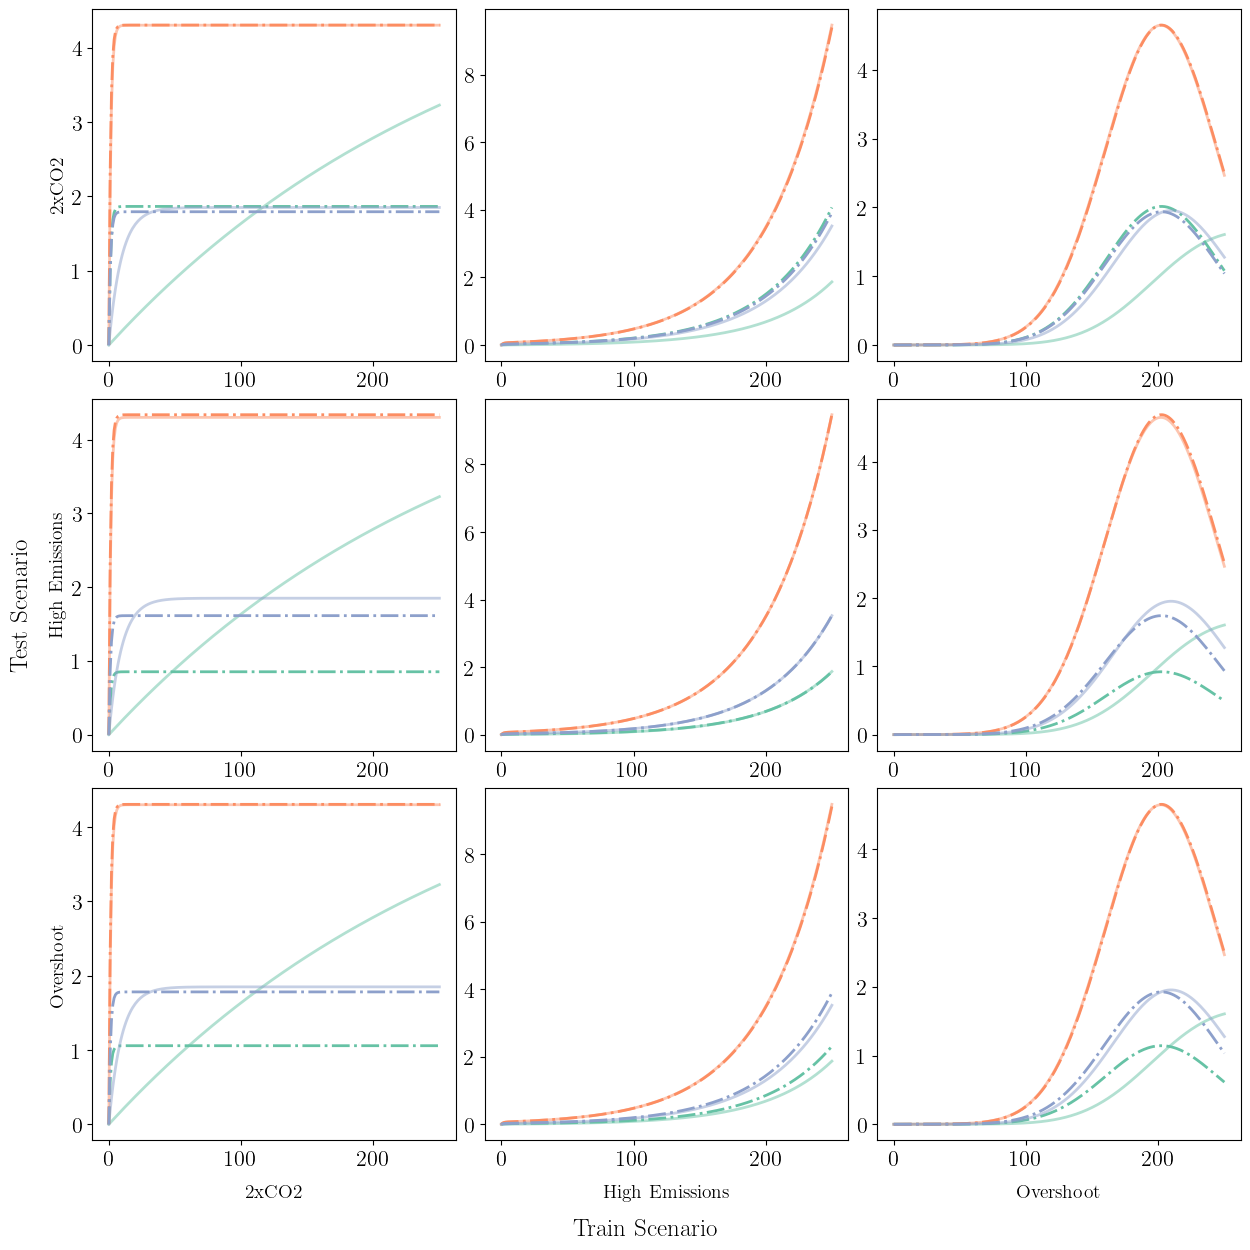

In [48]:
operator_fit_DMD, T_pred_fit_DMD, L2_fit_DMD = emulator_utils.emulate_experiments('fit_DMD', experiments=experiments, outputs=T_out, forcings=forcings, t=t, dt=dt, n_boxes=n_boxes, n_modes=1, B=np.ones(n_boxes))
emulator_utils.plot_true_pred(T_out, T_pred_fit_DMD, experiments)